# 🏦 Forecast of Revenue

<div class="alert alert-block alert-success">

## Table of Content:

1. [Introduction](#1-bullet)
* [EDA: Exploratory data analysis](#2-bullet)
* [Forecast model](#3-bullet)
* [Deployment](#4-bullet)

</div>

## 1. Introduction: <a class="anchor" id="1-bullet"></a>

<div class="alert alert-block alert-warning">

<b>This project is based on:</b>

https://github.com/aavail/ai-workflow-capstone


    
Data from:
    
https://archive.ics.uci.edu/ml/datasets/online+retail)

    
</div>

Import libraries

In [1]:
import sys,os,re,pickle
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for making plots with seaborn
import matplotlib.ticker as ticker
color = sns.color_palette()
from cslib import fetch_data,convert_to_ts,engineer_features,fetch_ts
import MissingValues as mv
import seaborn as sns

## 2. EDA: Exploratory data analysis <a class="anchor" id="2-bullet"></a>

In [3]:
data_dir = os.path.join('data','cs-train')

In [4]:
print(os.listdir(data_dir))

['invoices-2017-11.json', 'invoices-2017-12.json', 'invoices-2018-01.json', 'invoices-2018-02.json', 'invoices-2018-03.json', 'invoices-2018-04.json', 'invoices-2018-05.json', 'invoices-2018-06.json', 'invoices-2018-07.json', 'invoices-2018-08.json', 'invoices-2018-09.json', 'invoices-2018-10.json', 'invoices-2018-11.json', 'invoices-2018-12.json', 'invoices-2019-01.json', 'invoices-2019-02.json', 'invoices-2019-03.json', 'invoices-2019-04.json', 'invoices-2019-05.json', 'invoices-2019-06.json', 'invoices-2019-07.json', 'ts-data']


In [5]:
df = fetch_data(data_dir)
df.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,13085.0,28,489434,11,6.95,85048,12,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815011 entries, 0 to 815010
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   country       815011 non-null  object        
 1   customer_id   625249 non-null  float64       
 2   day           815011 non-null  int64         
 3   invoice       815011 non-null  object        
 4   month         815011 non-null  int64         
 5   price         815011 non-null  float64       
 6   stream_id     815011 non-null  object        
 7   times_viewed  815011 non-null  int64         
 8   year          815011 non-null  int64         
 9   invoice_date  815011 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 62.2+ MB


In [17]:
df.describe()

,customer_id,day,month,price,times_viewed,year
count,625249.000000,815011.000000,815011.000000,815011.000000,815011.000000,815011.000000
mean,15333.415068,15.064819,6.592718,4.802631,5.231106,2018.247654
std,1698.360788,8.788845,3.598781,135.058707,5.109982,0.545261
min,12346.000000,1.000000,1.000000,-53594.360000,0.000000,2017.000000
25%,13956.000000,7.000000,3.000000,1.250000,1.000000,2018.000000
50%,15279.000000,15.000000,6.000000,2.100000,3.000000,2018.000000
75%,16813.000000,23.000000,10.000000,4.210000,8.000000,2019.000000
max,18287.000000,31.000000,12.000000,38970.000000,24.000000,2019.000000


In [6]:
mv.missing_values_table(df)

Your selected dataframe has 10 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
customer_id,189762,23.3


In [20]:
df.query('price<0')

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
180418,United Kingdom,NaN,26,506401,4,-53594.36,B,1,2018,2018-04-26
276274,United Kingdom,NaN,16,516228,7,-44031.79,B,1,2018,2018-07-16
403469,United Kingdom,NaN,17,528059,10,-38925.87,B,1,2018,2018-10-17


In [21]:
""" As per the above analysis, we identified that there are three such rows, lets remove them from our data"""
df = df.query('price>0')
df.shape

(809643, 10)

### Top and Least performing coutries

In [10]:
df_countries=df.groupby('country').sum().sort_values(by='price',ascending = False)
print('Top countries with the greatest Revenues')
topCountries_to_show=df_countries.head(10).index.tolist()
print(topCountries_to_show)

Top countries with the greatest Revenues
['United Kingdom', 'EIRE', 'Germany', 'France', 'Norway', 'Spain', 'Hong Kong', 'Portugal', 'Singapore', 'Netherlands']


In [11]:
df_countries=df.groupby('country').sum().sort_values(by='price',ascending = False)
print('Countries with the lowest Revenues')
LowestCountries_to_show=df_countries.tail(10).index.tolist()
print(LowestCountries_to_show)

Countries with the lowest Revenues
['Lebanon', 'European Community', 'Brazil', 'Thailand', 'Korea', 'West Indies', 'Nigeria', 'Bermuda', 'Czech Republic', 'Saudi Arabia']


In [12]:
topCountries_to_show=df_countries.head(10).index.tolist()
df_indexed=df.set_index('country')
df_top = df_indexed.loc[topCountries_to_show]
df_low = df_indexed.loc[LowestCountries_to_show]

In [11]:
df.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,13085.0,28,489434,11,6.95,85048,12,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


C:\Users\GopiMarisetty\anaconda3\lib\site-packages\seaborn\distributions.py:347: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)


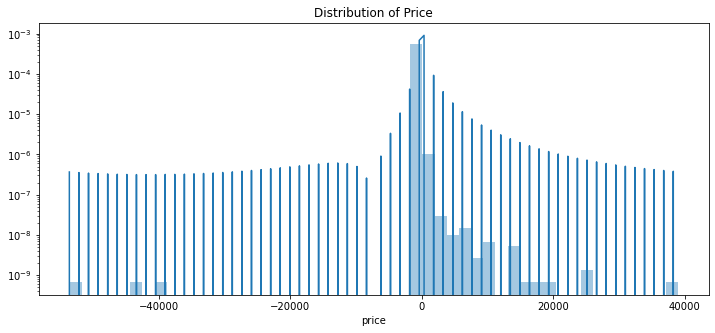

In [7]:
plt.figure(figsize=(12,5))
plt.title("Distribution of Price")
plt.yscale('log')
#plt.xlabel('')
ax = sns.distplot(df["price"])


In [ ]:
df.plot.bar(figsize=(15,5))
plt.yscale('log')
plt.xlabel('')
plt.xticks(rotation=30)
plt.ylabel('Revenue')
plt.title('Revenue changes of Top 10 countries in log scale')

In [12]:
#G
df_countries.head()

,customer_id,day,month,price,times_viewed,year
country,,,,,,
United Kingdom,8.769840e+09,8561748,3727436,2.037149e+06,3306359,1137820252
EIRE,1.781095e+08,193385,78953,9.243843e+04,100088,24521260
Germany,1.682911e+08,202940,81663,4.927182e+04,112599,26900126
France,1.245792e+08,138359,61680,4.039552e+04,82518,19820094
Norway,1.002374e+07,12753,7108,3.849475e+04,7881,1606587


In [13]:
pd.pivot_table(data=df_top,index='country',values='price',aggfunc='sum')

,price
country,
Belgium,1.119061e+04
EIRE,9.243843e+04
France,4.039552e+04
Germany,4.927182e+04
Netherlands,1.232280e+04
Norway,3.849475e+04
Portugal,1.328929e+04
Singapore,1.317592e+04
Spain,1.604099e+04


In [36]:
table=pd.pivot_table(data=df[df.country.isin(topCountries_to_show)],index='country',columns='year',values='price',aggfunc='sum')
table.head()

year,2017,2018,2019
country,,,
EIRE,4433.09,74398.300,28237.82
France,1200.34,24538.340,14826.46
Germany,1525.79,30554.331,17191.70
Hong Kong,NaN,8715.380,5737.19
Netherlands,384.26,8948.110,2990.43


Coutry wise revenue among the top performing coutries in three concurrant years. this shows that United Kingdom is the winner in the race

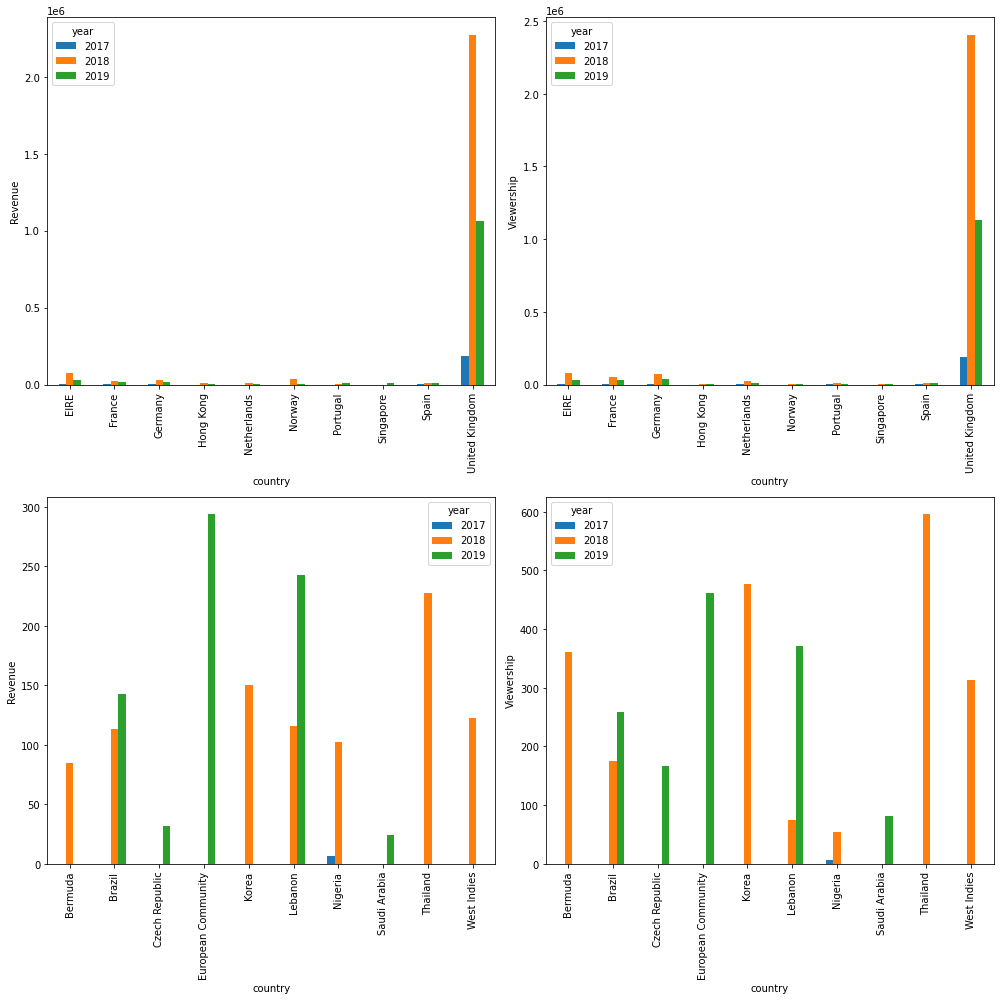

In [13]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(14,14))
gs = GridSpec(nrows=2, ncols=2)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[1,0])
ax4= fig.add_subplot(gs[1,1])

table1= pd.pivot_table(data=df[df.country.isin(topCountries_to_show)], index='country', columns='year', values='price',aggfunc='sum')
table1.plot(kind='bar', ax=ax1)
ax1.set_ylabel("Revenue")

table2= pd.pivot_table(data=df[df.country.isin(topCountries_to_show)], index='country', columns='year', values='times_viewed',aggfunc='sum')
table2.plot(kind='bar', ax=ax2)
ax2.set_ylabel("Viewership")

table3= pd.pivot_table(data=df[df.country.isin(LowestCountries_to_show)], index='country', columns='year', values='price',aggfunc='sum')
table3.plot(kind='bar', ax=ax3)
ax3.set_ylabel("Revenue")

table4= pd.pivot_table(data=df[df.country.isin(LowestCountries_to_show)], index='country', columns='year', values='times_viewed',aggfunc='sum')
table4.plot(kind='bar', ax=ax4)
ax4.set_ylabel("Viewership")

plt.tight_layout()
plt.show()


In [8]:
def countplot_ap(feature):
    """
    This function will plot the countplot for the given variable/Column in the grouped/Pivot Data (app_train)
    It will make use of seaborn countplot function. 
    Reference: #https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
    Usage: countplot_ap(feature)
            feature is the column name in the DataFrame passed to the function
    
    """
    

    ncount = len(df)
    if feature not in df.columns:
        print(feature," is not a valid column name, Please pass valid column name to function")
        return
    plt.figure(figsize=(12,8))
    ax = sns.countplot(x=feature, hue="year", data=table1)
    
    plt.title(str('Distribution of '+ feature))
    plt.xlabel(feature)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
   # ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)

    

In [ ]:
countplot_ap('price')

better picture visually with the help of logscale

Text(0.5, 1.0, 'Revenue changes of Top 10 countries in log scale')

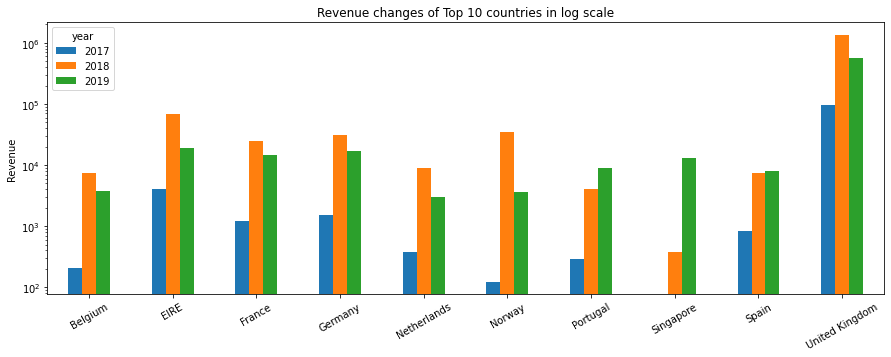

In [16]:
table1.plot.bar(figsize=(15,5))
plt.yscale('log')
plt.xlabel('')
plt.xticks(rotation=30)
plt.ylabel('Revenue')
plt.title('Revenue changes of Top 10 countries in log scale')

In [38]:
countries_2019=df.query('year==2019').country.to_list()
countries_2018=df.query('year==2018').country.to_list()
df_2019=df[df.country.isin(countries_2019) & df.country.isin(countries_2018)]

In [63]:
df_diff=pd.pivot_table(data=df_2019.query('year!=2017'),index=(['year','country']),values='price',aggfunc='sum')
df_diff.columns=['Total_Revenue']
df_diff

Total_Revenue
year country                            
2018 Australia              4.140330e+03
     Austria                2.356520e+03
     Bahrain                3.567300e+02
     Belgium                7.291000e+03
     Brazil                 1.137100e+02
...                                  ...
2019 Switzerland            3.901840e+03
     USA                    7.420000e+01
     United Arab Emirates   7.757000e+01
     United Kingdom         1.062137e+06
     Unspecified            8.329700e+02

[66 rows x 1 columns]

In [95]:
def grouping_df(df,grp_var,stat_list,parent):
    """
    This function will apply the groupby options mentioned in the stat_list on df dataframe and return the resultant
    group by dataframe. The variable on which groupby is to be applied is passed through grp_var.
    makesure you remove other identifiable features /columns than grp_var
    
    Arguments: df- Dataframe on which groupby operation has to be applied
               grp_var -> group on variable
               stat_list -> group by operations list like ['count', 'mean', 'max', 'min', 'sum'] for numeric data and ['count', 'mean', 'sum']
                           for categorical data
                parent -> value to be appended while giving names to new columns
    
    Returns : aggregated dataframe (agg) for the input df
    """

    agg=pd.DataFrame()
    for stat in stat_list:
        temp_df=pd.DataFrame()
        temp_df=df.groupby(grp_var).agg(stat)
        for col in temp_df.columns:
            temp_df.rename(columns={col:parent+'_'+col+'_'+stat},inplace=True)
        agg = pd.concat([agg, temp_df], axis=1)
    aa, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]    
    return agg

In [29]:
country = 'United Kingdom'

df_UK = convert_to_ts(df, country)
X, y, dates = engineer_features(df_UK,training=True)

df_ts = X.copy()
df_ts['rev'] = y
df_ts['date'] = pd.to_datetime(dates)
df_ts_indexed=df_ts.set_index('date')
df_ts_indexed.head()


,previous_7,previous_14,previous_28,previous_70,previous_year,recent_invoices,recent_views,rev
date,,,,,,,,
2017-11-29,13281.12,13281.12,13281.12,13281.12,0.0,5.214286,460.464286,173959.95
2017-11-30,26504.09,26504.09,26504.09,26504.09,0.0,9.172414,913.586207,160736.98
2017-12-01,39445.59,39445.59,39445.59,39445.59,0.0,13.300000,1388.533333,147795.48
2017-12-02,48608.66,48608.66,48608.66,48608.66,0.0,16.500000,1776.300000,138632.41
2017-12-03,49871.94,49871.94,49871.94,49871.94,0.0,17.466667,1879.566667,139305.39


In [81]:
df_diff.groupby(by=['country']).agg('Total_Revenue').head()

0     4.140330e+03
1     2.356520e+03
2     3.567300e+02
3     7.291000e+03
4     1.137100e+02
          ...     
61    3.901840e+03
62    7.420000e+01
63    7.757000e+01
64    1.062137e+06
65    8.329700e+02
Name: Total_Revenue, Length: 66, dtype: float64

In [121]:
df_gr.head(34)

total_price_sum
year country                              
2018 Australia                4.140330e+03
     Austria                  2.356520e+03
     Bahrain                  3.567300e+02
     Belgium                  7.291000e+03
     Brazil                   1.137100e+02
     Canada                   1.475100e+02
     Channel Islands          5.306960e+03
     Cyprus                   1.719090e+03
     Denmark                  1.154230e+03
     EIRE                     7.439830e+04
     Finland                  1.446470e+03
     France                   2.453834e+04
     Germany                  3.055433e+04
     Greece                   1.783400e+03
     Hong Kong                8.715380e+03
     Iceland                  2.525400e+02
     Israel                   2.524900e+02
     Italy                    4.714970e+03
     Japan                    5.611100e+02
     Lebanon                  1.161700e+02
     Malta                    5.909580e+03
     Netherlands              8.948110e+03
     Norway                   3.471640e+04
     Poland                   4.967600e+02
     Portugal                 4.292260e+03
     Singapore                3.725100e+02
     Spain                    7.311560e+03
     Sweden                   6.945510e+03
     Switzerland              5.304290e+03
     USA                      9.699000e+02
     United Arab Emirates     2.189930e+03
     United Kingdom           2.408688e+06
     Unspecified              2.212390e+03
2019 Australia                2.672650e+03

In [119]:
df_gr.total_price_sum.pct_change()

year  country             
2018  Australia                        NaN
      Austria                    -0.430838
      Bahrain                    -0.848620
      Belgium                    19.438427
      Brazil                     -0.984404
                                  ...     
2019  Switzerland                 3.211831
      USA                        -0.980983
      United Arab Emirates        0.045418
      United Kingdom          13691.623334
      Unspecified                -0.999216
Name: total_price_sum, Length: 66, dtype: float64

In [122]:
list_reve_diff=df_diff.Total_Revenue.pct_change(periods=33)[33:]
list_country=df_diff.country.unique()

In [123]:
d = {'country': list_country, 'diff': list_reve_diff}
df_diff = pd.DataFrame(data=d)
df_diff =df_diff.query('diff>0').sort_values('diff')
df_diff.set_index(['country'], inplace=True)
df_diff

,diff
country,
Iceland,0.018928
Spain,0.078321
Brazil,0.254067
Finland,0.290929
Cyprus,0.374995
Poland,0.960242
Portugal,1.083299
Lebanon,1.086942
Canada,5.139177


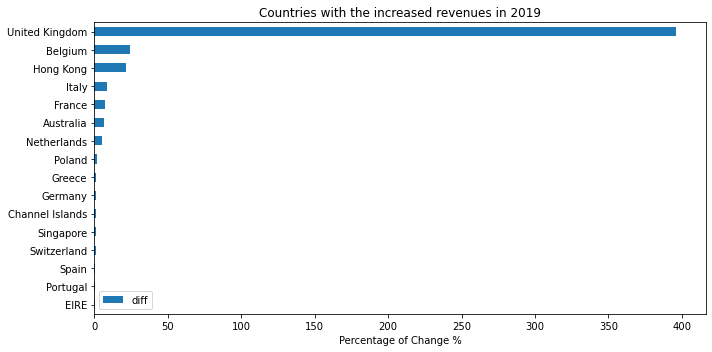

In [52]:
df_diff.plot.barh(figsize=(10,5))
plt.title('Countries with the increased revenues in 2019')
plt.xlabel('Percentage of Change %')
plt.ylabel('')
plt.tight_layout()

Revenues in Singapore, Canada, and Portugal have increased most

In [26]:
df['invoice_date']=(df.year.astype(str)+'-'+df.month.astype(str)+'-'+df.day.astype(str)).astype('datetime64')

Text(0.5, 1.0, 'Days purchased')

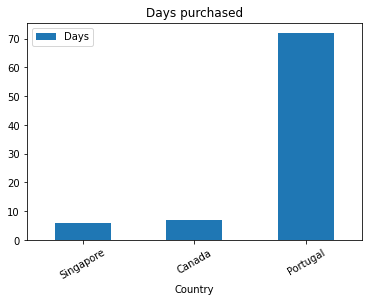

In [27]:
df_purchases = pd.DataFrame({'Country':['Singapore','Canada','Portugal'],
                               'Days':[df.query("country=='Singapore'").invoice_date.nunique(),
                                       df.query("country=='Canada'").invoice_date.nunique(),
                                       df.query("country=='Portugal'").invoice_date.nunique()]})
df_purchases.set_index('Country',inplace=True)
df_purchases.plot.bar()
plt.xticks(rotation=30)
plt.title('Days purchased')

Text(0.5, 1.0, 'Distribution: Viewership')

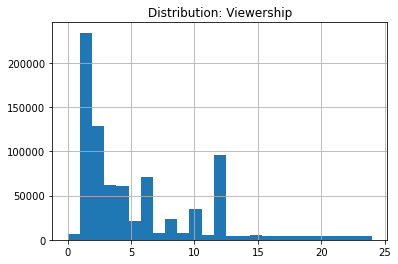

In [125]:
columns_to_show='times_viewed'
df.hist(column=columns_to_show, bins=25)
plt.title('Distribution: Viewership')

Text(0.5, 1.0, 'Distribution: subscription')

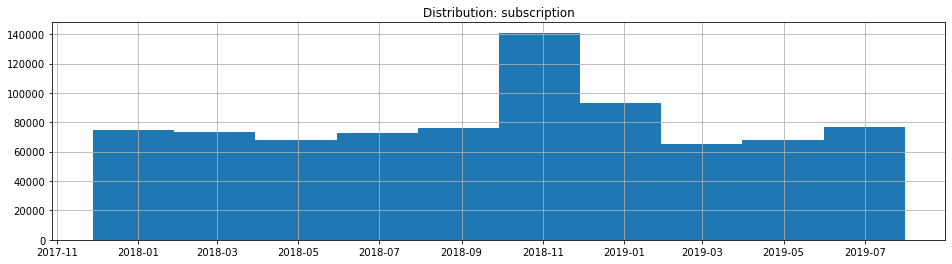

In [126]:
plt.figure(figsize=(16,4))
columns_to_show='invoice_date'
df.invoice_date.hist()
plt.title('Distribution: subscription')

Text(0.5, 1.0, 'Distribution: Viewership of Low Countries')

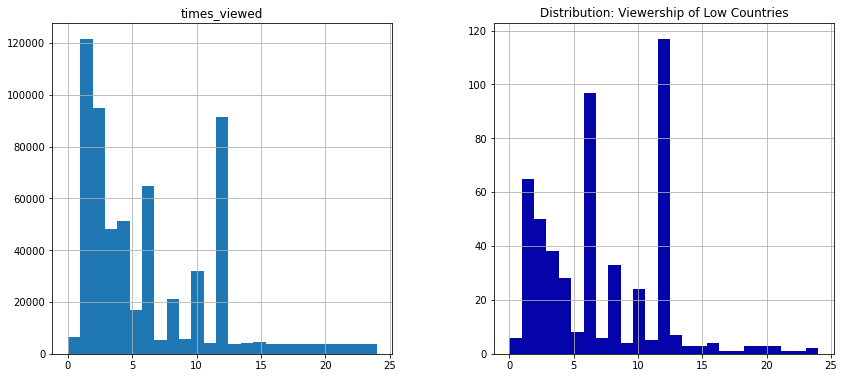

In [30]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(14,14))
gs = GridSpec(nrows=2, ncols=2)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])

columns_to_show='times_viewed'
df_top.hist(column=columns_to_show, bins=25, ax=ax1)
plt.title('Distribution: Viewership of Top Countries')

columns_to_show='times_viewed'
df_low.hist(column=columns_to_show, bins=25, color='#0504aa', ax=ax2)
plt.title('Distribution: Viewership of Low Countries')

Text(0.5, 1.0, 'Distribution: Signed Up Date of Low Countries')

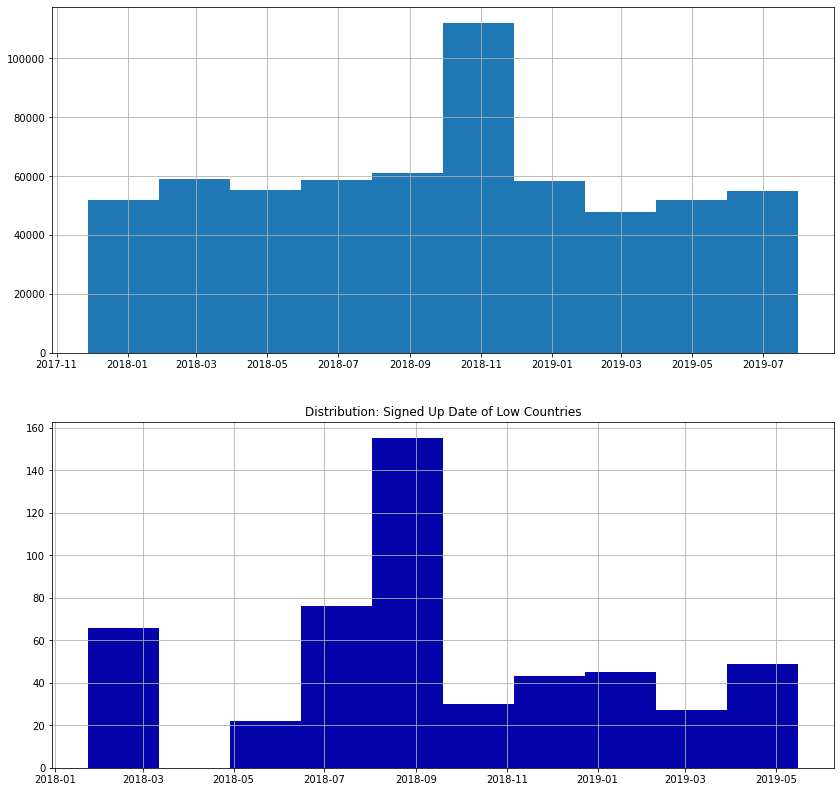

In [31]:
from datetime import datetime
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(14,14))
gs = GridSpec(nrows=2, ncols=1)

ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[1,0])

df_top.invoice_date.hist(ax=ax1)
plt.title('Distribution: Signed Up Date of Top Countries')

df_low.invoice_date.hist(ax=ax2, color='#0504aa')
plt.title('Distribution: Signed Up Date of Low Countries')


## 3. Forecast model <a class="anchor" id="3-bullet"></a>

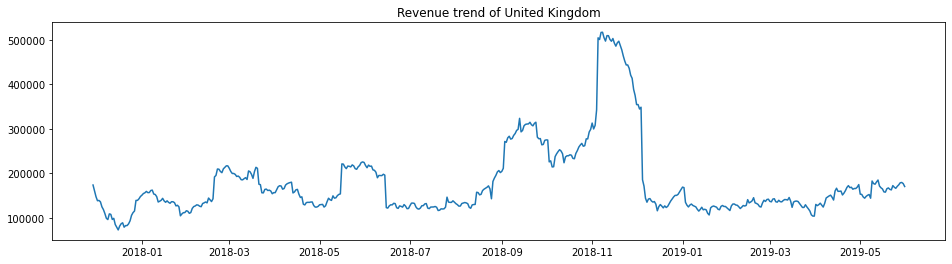

In [127]:
## Visualize Graph
plt.figure(figsize=(16,4))
plt.title(f'Revenue trend of {country}')
plt.plot(df_ts.date,df_ts.rev);

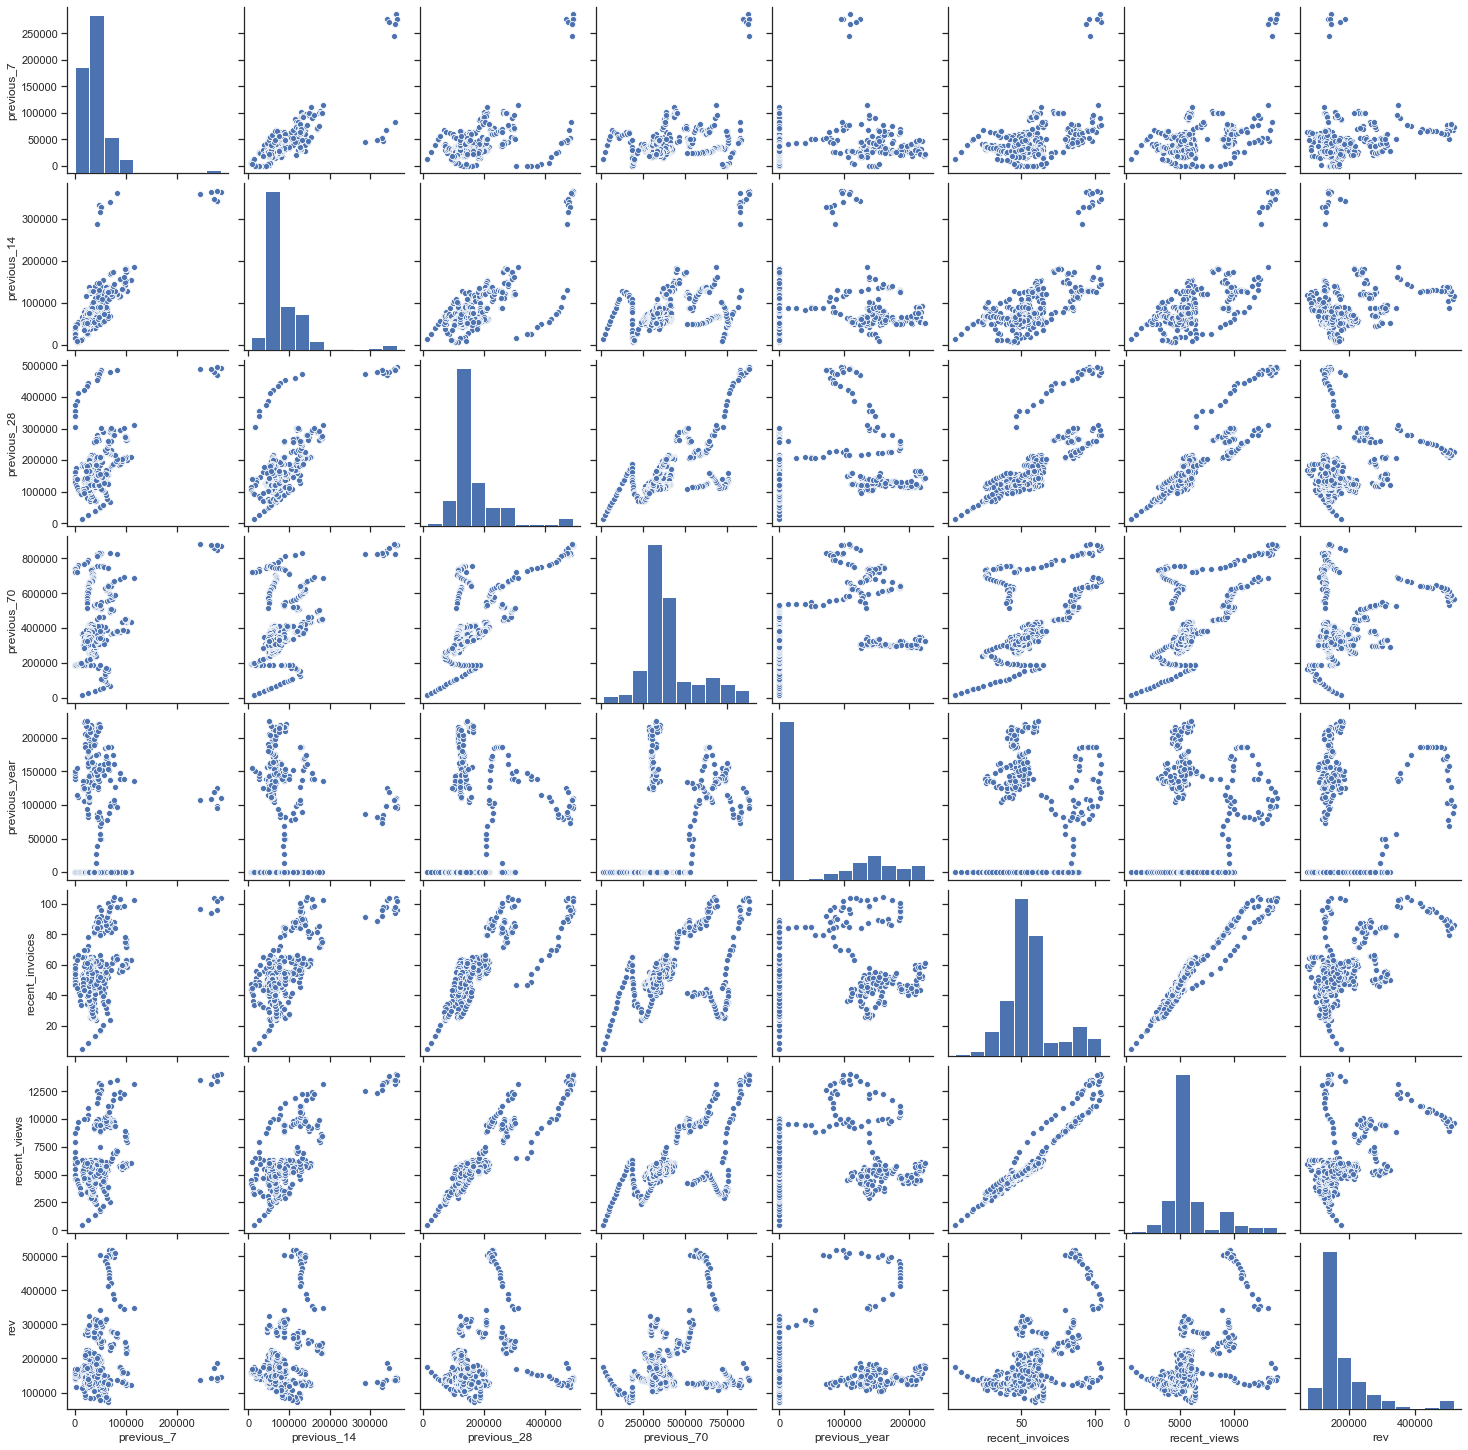

In [128]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

## make a pair plot
columns = list(df_ts_indexed.columns.values)
axes = sns.pairplot(df_ts_indexed,vars=columns, palette="husl")

### Training Model

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

... loading ts data from files
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished


RMSE on test data: 16686.000


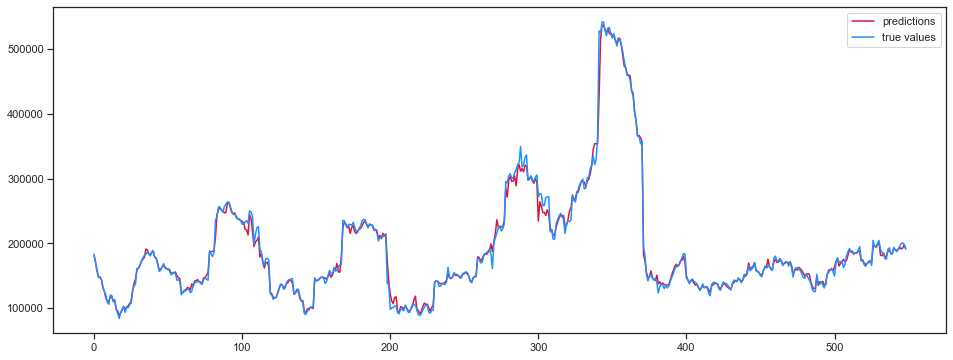

In [131]:
ts_data = fetch_ts(data_dir)
## create data
(X, y, dates) = engineer_features(ts_data['all'],training=True)

 ## Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    shuffle=True, random_state=42)
## train a random forest model
param_grid_rf = {
'rf__criterion': ['mse','mae'],
'rf__n_estimators': [10,15,20,25,50]
}

pipe_rf = Pipeline(steps=[('scaler', StandardScaler()),
                          ('rf', RandomForestRegressor())])

grid = GridSearchCV(pipe_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
eval_rmse =  round(np.sqrt(mean_squared_error(y_test,y_pred)))

## retrain using all data
grid.fit(X, y)
print("RMSE on test data: {:.3f}".format(eval_rmse))

## make predictions on full training set
y_pred = grid.predict(X)

## plot results
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(y_pred, color="crimson", label="predictions")
ax.plot(y, color="dodgerblue", label="true values")
ax.legend();

Lets hide the test data to the training model. This will give better results, since the model will try to handle the unseen data.

... loading ts data from files
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.8s finished


RMSE on test data: 16017.000


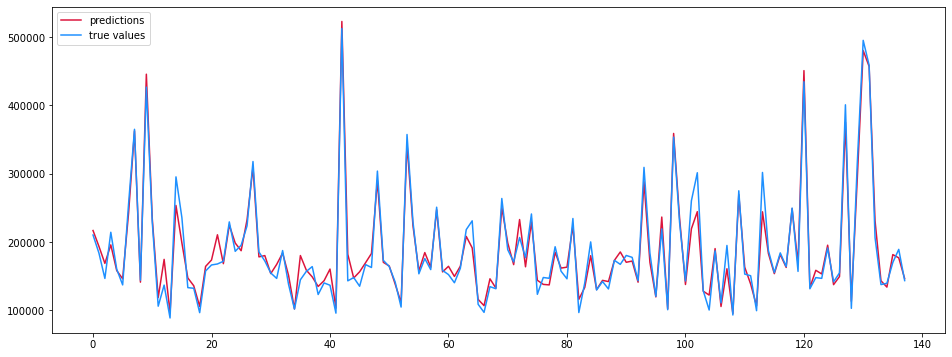

In [7]:
ts_data = fetch_ts(data_dir)
## create data
(X, y, dates) = engineer_features(ts_data['all'],training=True)

 ## Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    shuffle=True, random_state=42)
## train a random forest model
param_grid_rf = {
'rf__criterion': ['mse','mae'],
'rf__n_estimators': [10,15,20,25,50]
}

pipe_rf = Pipeline(steps=[('scaler', StandardScaler()),
                          ('rf', RandomForestRegressor())])

grid = GridSearchCV(pipe_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
eval_rmse =  round(np.sqrt(mean_squared_error(y_test,y_pred)))
print("RMSE on test data: {:.3f}".format(eval_rmse))

## plot results
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(y_pred, color="crimson", label="predictions")
ax.plot(y_test, color="dodgerblue", label="true values")
ax.legend();

In [8]:
X.head()

,previous_7,previous_14,previous_28,previous_70,previous_year,recent_invoices,recent_views
0,14450.54,14450.54,14450.54,14450.54,0.0,5.928571,537.392857
1,27862.50,27862.50,27862.50,27862.50,0.0,10.310345,1007.103448
2,41152.75,41152.75,41152.75,41152.75,0.0,14.966667,1499.066667
3,50840.03,50840.03,50840.03,50840.03,0.0,18.533333,1916.533333
4,52283.29,52283.29,52283.29,52283.29,0.0,19.600000,2026.966667


In [139]:
!python run-tests.py

... test flag on
...... subseting data
...... subseting countries
... loading ts data from files
... saving test version of model: models\test-all-0_1.joblib
... saving test version of model: models\test-united_kingdom-0_1.joblib


ssss....C:\Users\GopiMarisetty\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
C:\Users\GopiMarisetty\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
C:\Users\GopiMarisetty\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
C:\Users\GopiMarisetty\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
.EE
ERROR: test_02_load (ModelTests.ModelTest)
test the train functionality
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\T490_01Aug2020\AI-Acade

In [14]:
req={'query':('all','2018','01','05'),'type':'dict','mode':'test'}

In [7]:
_result=model_predict('all','2018','01','05')
result={}

... loading ts data from files
2018-01-05


In [16]:
print(result)

{'y_pred': [183213.76200000005], 'y_proba': None}


## 4. Deployment <a class="anchor" id="4-bullet"></a>

### Flask API

The API performs the train, predict and logfile tasks

In [3]:
%%writefile app.py

import argparse
from flask import Flask, jsonify, request
from flask import render_template
import joblib
import socket
import json
import numpy as np
import pandas as pd
import os

## import model specific functions and variables
#from modelling import *
from logger import *
from model import *
app = Flask(__name__)

@app.route("/")
def hello():
    html = "<h3>Hello {name}!</h3>" \
           "<b>Hostname:</b> {hostname}<br/>"
    return html.format(name=os.getenv("NAME", "world"), hostname=socket.gethostname())

@app.route('/predict', methods=['GET','POST'])

def predict():
    """
    basic predict function for the API
    """
   # return(jsonify({'y_pred': 206, 'y_proba': 1}))
    ## input checking
    if not request.json:
        print("ERROR: API (predict): did not receive request data")
        return jsonify([])

    if 'query' not in request.json:
        print("ERROR API (predict): received request, but no 'query' found within",request,"req-json",request.json)
        return jsonify([])

    if 'type' not in request.json:
        print("WARNING API (predict): received request, but no 'type' was found assuming 'numpy'")
        query_type = 'numpy'

    ## set the test flag
    test = False
    if 'mode' in request.json and request.json['mode'] == 'test':
        test = True

    ## extract the query
    query = request.json['query']
    country=query['country']
    year=query['year']
    month=query['month']
    day=query['day']
        
    if request.json['type'] == 'dict':
        pass
    else:
        print("ERROR API (predict): only dict data types have been implemented")
        return jsonify([])
        
    ## load model
    model = model_load()
    
    if not model:
        print("ERROR: model is not available")
        return jsonify([])

    #_result = model_predict(country,year,month,day,model,test=test)
    _result = model_predict(country,year,month,day)

    result = {}
    
    ## convert numpy objects to ensure they are serializable
    for key,item in _result.items():
        if isinstance(item,np.ndarray):
            result[key] = item.tolist()
        else:
            result[key] = item
    print(result)
    return(jsonify(result))
    #return(jsonify({'y_pred': [183213.76200000005], 'y_proba': 1})) 


@app.route('/train', methods=['GET','POST'])
def train():
    """
    basic train function for the API

    the 'dev' give you the ability to toggle between a DEV version and a PROD verion of training
    """


    print("... training model")
    print(request.json)
    #model = model_train(dev=request.json['dev']=="True", verbose=verbose=="True")
    #model = model_train(dev=request.json['dev']=="True", verbose=request.json['verbose']=="True")
    model= model_train()
    print("... training complete")

    return(jsonify(True))

@app.route('/logging', methods=['GET','POST'])
def load_logs():
    """
    basic logging function for the API
    """

    if not request.json:
        print("ERROR: API (train): did not receive request data")
        return jsonify(False)

    if 'env' not in request.json:
        print("ERROR API (log): received request, but no 'env' found within")
        return jsonify(False)
        
    if 'type' not in request.json:
        print("ERROR API (log): received request, but no 'type' found within")
        return jsonify(False)

    if 'tag' not in request.json:
        print("ERROR API (log): received request, but no 'tag' found within")
        return jsonify(False)
        
  
    print("... fetching logfile")
    logfile = log_load(env=request.json['env'],
                       tag=request.json['tag'],
                       env1=request.json['type'])
                    #   month=request.json['month'])
    
    result = {}
    result["logfile"]=logfile
    return(jsonify(result))

if __name__ == '__main__':

    ## parse arguments for debug mode
    ap = argparse.ArgumentParser()
    ap.add_argument("-d", "--debug", action="store_true", help="debug flask")
    args = vars(ap.parse_args())

    if args["debug"]:
        app.run(debug=True, port=8080)
    else:
        #app.run(host='0.0.0.0', threaded=True ,port=8080)
        app.run(host='localhost', threaded=True ,port=8080)

Overwriting app.py


<div class="alert alert-block alert-info">

app.py file contains the Flask API , to run the flask API go to the project directory where app.py is saved and use the below command from the command window.

> python app.py

Then click on  http://localhost:8080/ or copy and paste the url in browser
    
</div>

In [40]:
## API predict
import requests
from ast import literal_eval

#query = {"year":"2018","month":"1","day":"5","country":"total","dev":"True","verbose":"True"}
query=('all','2018','01','05')
query={"query":{"country":'all',"year":'2018',"month":'01',"day":'05'},"type":"dict"}
port = 8080
requests.post('http://localhost:{}/predict'.format(port),json=query)
r = requests.post('http://localhost:{}/predict'.format(port),json=query)
print(r)
response = literal_eval(r.text)
print(response)

<Response [200]>
{'y_pred': [183213.76200000005]}


In [10]:
import requests
from ast import literal_eval

In [12]:
## API train
query = {"dev":"True","verbose":"True"}
port = 8080
r = requests.post('http://localhost:{}/train'.format(port),json=query)
#response = literal_eval(r.text)
print(r)

<Response [200]>


In [19]:
## API logging
#query = {"env":"test","type":"train","year":"2020","month":"5"}
query = {"tag":"all","env":"test","type":"train"}

port = 8080
r = requests.post('http://localhost:{}/logging'.format(port),json=query)
print(r)
response = literal_eval(r.text)
print(response)

<Response [200]>
{'logfile': 'all-test-train.log'}


We have tested, Train,Predict and view logs options of the API. Now Stop the server and we can test the app from the docker later

In [20]:
%%writefile ./unittests/__init__.py

import unittest
import getopt
import sys
import os

## parse inputs
try:
    optlist, args = getopt.getopt(sys.argv[1:],'v')
except getopt.GetoptError:
    print(getopt.GetoptError)
    print(sys.argv[0] + "-v")
    print("... the verbose flag (-v) may be used")
    sys.exit()

VERBOSE = False
RUNALL = False

sys.path.append(os.path.realpath(os.path.dirname(__file__)))

for o, a in optlist:
    if o == '-v':
        VERBOSE = True

## api tests
from ApiTests import *
ApiTestSuite = unittest.TestLoader().loadTestsFromTestCase(ApiTest)

## model tests
from ModelTests import *
ModelTestSuite = unittest.TestLoader().loadTestsFromTestCase(ModelTest)

## logger tests
from LoggerTests import *
LoggerTestSuite = unittest.TestLoader().loadTestsFromTestCase(LoggerTest)

MainSuite = unittest.TestSuite([ApiTestSuite,ModelTestSuite,LoggerTestSuite])


Overwriting ./unittests/__init__.py


In [33]:
%%writefile ./unittests/ModelTests.py
#!/usr/bin/env python

"""
model tests
"""

import unittest
#from modelling import *
from model import *

class ModelTest(unittest.TestCase):
    """
    test the essential functionality
    """
    
    def test_01_train(self):
        """
        test the train functionality
        """
    
        ## train the model
       # model_train(verbose=False)
       # model_train()
        
        prefix = "test" if DEV else "prod"
        #models = [f for f in os.listdir(MODEL_DIR) if re.search(prefix,f)]
        #self.assertEqual(len(models),11)
        
    def test_02_load(self):
        """
        test the train functionality
        """
        
        ## load the model
        #models = model_load(verbose=False)
        models = model_load()
        
        for tag, model in models.items():
            self.assertTrue("predict" in dir(model))
            self.assertTrue("fit" in dir(model))
        
    def test_03_predict(self):
        """
        test the predict function input
        """
    
        ## query inputs
        query = "2018", "1", "5", "all"
        
        ## load model first
        #result = model_predict(year=query[0], month=query[1], day=query[2], country=query[3], verbose=False)
        result = model_predict(year=query[0], month=query[1], day=query[2], country=query[3])
        y_pred = result["y_pred"]
        self.assertTrue(y_pred.dtype==np.float64)
            
    def test_04_predict(self):
        """
        test the predict function accuracy
        """
    
        ## example predict
        example_queries = [("2018", "1", "5", "all"),
                           ("2019", "2", "5", "eire"),
                           ("2018", "12", "5", "france")]
        
        for query in example_queries:
            #result = model_predict(year=query[0], month=query[1], day=query[2], country=query[3], verbose=False)
            result = model_predict(year=query[0], month=query[1], day=query[2], country=query[3])
            y_pred = result["y_pred"]
            self.assertTrue(y_pred.dtype==np.float64)
            
## run the tests
if __name__ == "__main__":
    DEV=True
    unittest.main()

Overwriting ./unittests/ModelTests.py


In [34]:
%run ./unittests/ModelTests.py

.

... loading ts data from files


E

... loading ts data from files


.

2018-01-05
[184224.625] None
... loading ts data from files
2018-01-05
[184224.625] None
... loading ts data from files
2019-02-05
[1442.825] None
... loading ts data from files


.

2018-12-05
[1817.8828] None



ERROR: test_02_load (__main__.ModelTest)
test the train functionality
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\T490_01Aug2020\AI-Academy-IBM\PartB\Capstone Project\ai-workflow-capstone-master\ai-workflow-capstone-master - Gopi\unittests\ModelTests.py", line 38, in test_02_load
    for tag, model in models.items():
AttributeError: 'tuple' object has no attribute 'items'

----------------------------------------------------------------------
Ran 4 tests in 180.390s

FAILED (errors=1)


SystemExit: True

In [ ]:
%%writefile ./unittests/LoggerTests.py
#!/usr/bin/env python
"""
logger tests
"""

import unittest
## import model specific functions and variables
from logger import *

class LoggerTest(unittest.TestCase):
    """
    test the essential log functionality
    """
        
    def test_01_train(self):
        """
        test the train functionality
        """

        ## train logfile
        today = date.today()
        logfile = "{}-train-{}-{}.log".format("test",today.year,today.month)
        log_path = os.path.join(LOG_DIR, logfile)
        
        self.assertTrue(os.path.exists(log_path))

    def test_02_predict(self):
        """
        test the predict functionality
        """
        
        ## train logfile
        today = date.today()
        logfile = "{}-predict-{}-{}.log".format("test",today.year,today.month)
        log_path = os.path.join(LOG_DIR, logfile)
        
        self.assertTrue(os.path.exists(log_path))

    def test_03_load(self):
        """
        test the load functionality
        """

        ## load model first
        logfile = log_load(env="test",tag="train",year=2020,month=5, verbose=False)
        logpath = os.path.join(LOG_DIR, logfile)
        with open(logpath, "r") as log:
            text = log.read()
        self.assertTrue(len(text.split("\n"))>2)

        
### Run the tests
if __name__ == '__main__':
    unittest.main()


In [ ]:
%run ./unittests/LoggerTests.py

In [ ]:
%%writefile ./unittests/ApiTests.py
#!/usr/bin/env python
"""
api tests

these tests use the requests package however similar requests can be made with curl

e.g.
data = '{"key":"value"}'
curl -X POST -H "Content-Type: application/json" -d "%s" http://localhost:8080/predict'%(data)
"""

import sys
import os
import unittest
import requests
import re
from ast import literal_eval
import numpy as np
import pandas as pd

port = 8080

try:
    requests.post('http://localhost:{}/predict'.format(port))
    server_available = True
except:
    server_available = False
    
## test class for the main window function
class ApiTest(unittest.TestCase):
    """
    test the essential functionality
    """
    
    @unittest.skipUnless(server_available,"local server is not running")
    def test_predict(self):
        """
        test the predict functionality
        """
        
        query = {"year":"2018","month":"1","day":"5","country":"total","dev":"True","verbose":"True"}
        r = requests.post('http://localhost:{}/predict'.format(port),json=query)
        response = literal_eval(r.text)
        self.assertTrue(isinstance(response["y_pred"][0], float))

    @unittest.skipUnless(server_available,"local server is not running")
    def test_train(self):
        """
        test the train functionality
        """
      
        query = {"dev":"True","verbose":"False"}
        r = requests.post('http://localhost:{}/train'.format(port),json=query)
        train_complete = re.sub("\W+","",r.text)
        self.assertEqual(train_complete,'true')
        
    @unittest.skipUnless(server_available,"local server is not running")
    def test_logging(self):
        """
        test the logging functionality
        """
        
        query = {"env":"test","type":"train","year":"2020","month":"5"}
        r = requests.post('http://localhost:{}/logging'.format(port),json=query)
        response = literal_eval(r.text)
        self.assertEqual(response.get("logfile"),'test-train-2020-5.log')

### Run the tests
if __name__ == '__main__':
    unittest.main()

In [35]:
%%writefile ./unittests/ApiTests.py
#!/usr/bin/env python
"""
api tests

these tests use the requests package however similar requests can be made with curl

e.g.
data = '{"key":"value"}'
curl -X POST -H "Content-Type: application/json" -d "%s" http://localhost:8080/predict'%(data)
"""

import sys
import os
import unittest
import requests
import re
from ast import literal_eval
import numpy as np
import pandas as pd

port = 8080

try:
    requests.post('http://localhost:{}/predict'.format(port))
    server_available = True
except:
    server_available = False
    
## test class for the main window function
class ApiTest(unittest.TestCase):
    """
    test the essential functionality
    """
    
    @unittest.skipUnless(server_available,"local server is not running")
    def test_predict(self):
        """
        test the predict functionality
        """
        
        #query = {"year":"2018","month":"1","day":"5","country":"total","dev":"True","verbose":"True"}
        query={"query":{"country":'all',"year":'2018',"month":'01',"day":'05'},"type":"dict"}
        r = requests.post('http://localhost:{}/predict'.format(port),json=query)
        response = literal_eval(r.text)
        self.assertTrue(isinstance(response["y_pred"][0], float))

    @unittest.skipUnless(server_available,"local server is not running")
    def test_train(self):
        """
        test the train functionality
        """
      
        query = {"dev":"True","verbose":"False"}
        r = requests.post('http://localhost:{}/train'.format(port),json=query)
        train_complete = re.sub("\W+","",r.text)
        self.assertEqual(train_complete,'true')
        
    @unittest.skipUnless(server_available,"local server is not running")
    def test_logging(self):
        """
        test the logging functionality
        """
        
        #query = {"env":"test","type":"train","year":"2020","month":"5"}
        query = {"tag":"all","env":"test","type":"train"}
        r = requests.post('http://localhost:{}/logging'.format(port),json=query)
        response = literal_eval(r.text)
        #self.assertEqual(response.get("logfile"),'test-train-2020-5.log')
        self.assertEqual(response.get("logfile"),'all-test-train.log')
        

### Run the tests
if __name__ == '__main__':
    unittest.main()

Overwriting ./unittests/ApiTests.py


In [36]:
%run ./unittests/ApiTests.py

...
----------------------------------------------------------------------
Ran 3 tests in 234.681s

OK


In [37]:
%%writefile run-tests.py
#!/usr/bin/python 

import sys
import unittest

from unittests import *
unittest.main()

Overwriting run-tests.py


we can run the tests either individually (each for app, logger, predict etc. or we can run all from run-tests.py

> python run-tests.py


In [ ]:
## Docker Container

**Create Docker File**

Before we build the DockerFile first we need to create a requirement.txt

In [7]:
%%writefile requirements.txt

cython
numpy
flask
pandas
scikit-learn
matplotlib
IPython
seaborn

Overwriting requirements.txt


In [8]:
%%writefile Dockerfile

# Use an official Python runtime as a parent image
FROM python:3.7.5-stretch

RUN apt-get update && apt-get install -y \
python3-dev \
build-essential    
        
# Set the working directory to /app
WORKDIR /app

# Copy the current directory contents into the container at /app
ADD . /app

# Install any needed packages specified in requirements.txt
RUN pip install --upgrade pip
RUN pip install --no-cache-dir -r requirements.txt

# Make port 80 available to the world outside this container
EXPOSE 80

# Define environment variable
ENV NAME World

# Run app.py when the container launches
CMD ["python", "app.py"]

Overwriting Dockerfile


**Test the running app**

First go to [http://localhost:4000/](http://localhost:4000/) to ensure the app is running and accessible.

In [2]:
import requests
import re
from ast import literal_eval

In [11]:
## API predict

#query = {"year":"2018","month":"1","day":"5","country":"total","dev":"True","verbose":"True"}
query={"query":{"country":'all',"year":'2018',"month":'01',"day":'05'},"type":"dict"}
port = 4000
r = requests.post('http://localhost:{}/predict'.format(port),json=query)
print(r)
response = literal_eval(r.text)
print(response)

<Response [200]>
{'y_pred': [184128.60287999996]}


In [9]:
## API logging

#query = {"env":"test","type":"train","year":"2020","month":"5"}
query = {"tag":"all","env":"test","type":"train"}
port = 4000
r = requests.post('http://localhost:{}/logging'.format(port),json=query)
response = literal_eval(r.text)
print(response)

{'logfile': 'all-test-train.log'}


In [ ]:
## Post Production Analysis
### Perfomance Monitoring

Here we have a function to simulate new samples using the bootstrap, which as a reminder is sampling with replacement. We measure the accuracy of the model and see how it changes when more data are accounted in the sample.

In [40]:
#!/usr/bin/env python
#gopi
import time
import numpy as np
import pandas as pd
import time,os,re,csv,sys,uuid,joblib
#from data_engineering import engineer_features
from cslib import engineer_features,fetch_ts
#from modelling import _model_train, model_predict
from model import _model_train, model_predict
from sklearn.metrics import mean_squared_error
from sklearn.covariance import EllipticEnvelope
from scipy.stats import wasserstein_distance
from collections import defaultdict
from sklearn.preprocessing import StandardScaler

## switch to production
DEV = False

def simulate_samples(n_samples, X, y, dates):
    """
    simulate new samples (via bootstrap)
    """
    
    indices = np.arange(y.size)
    new_indices = np.random.choice(indices, n_samples, replace=True)
    
    X_new = X[new_indices,:]
    y_new = y[new_indices]
    dates_new = dates[new_indices]
    return X_new, y_new, dates_new


#def model_monitor(country="total", dev=DEV, training=True):
def model_monitor(country="all", training=True,data_dir=None):
    """
    performance monitoring
    """
    print("Monitor Model")
    
    ## import data
    #datasets = engineer_features(training=training, dev=dev)
    #Gopi
    if not data_dir:
        data_dir = os.path.join("data","cs-train")
        
    df = fetch_ts(data_dir)
    print(df.keys())

    ## load data
    ts_data = fetch_ts(data_dir)
    all_data = {}
    for country_t, df in ts_data.items():
        
        if country_t not in ['all','united_kingdom']:
            continue
        
        XX,yy,ddates = engineer_features(df,training=training)
        dates = np.array([str(d) for d in ddates])
        print(type(XX),type(yy),type(ddates))
        all_data[country_t] = {"X":XX,"y":yy,"dates": ddates}
        print(type(all_data[country_t] ),type(all_data),type(all_data[country_t]['X']),country)


    #datasets = engineer_features(df,training=training)
    datasets = all_data
    print(all_data.keys())
    #print(all_data['all'])
    #X, y, dates, labels = datasets[country]
    X=datasets[country]['X']
    y=datasets[country]['y']
    dates=datasets[country]['dates']
    #X, y, dates = datasets[country]
    #X, y, dates = pd.DataFrame(datasets[country])
    print(X.head(1))
    print(type(X),type(y),type(dates),type(datasets))
    #print(type(XXX))
   # print(XXX.shape)
    print(X.shape,y.shape,dates.shape)
    #dates = pd.to_datetime(dates)
    return(X,y,dates)
    #print(X.shape)
    
    ## train the model
   # if training:
        #_model_train(X, y, labels, tag=country, dev=dev)
    #    _model_train(datasets[country] , tag=country)
    
    
       
    ## monitor performance
def samples_rmse(X,y,dates,samples=None):
    ## monitor RMSE
    samples = [10, 20, 30, 50, 60]

    for n in samples:
        X_new, y_new, dates_new = simulate_samples(n, X, y, dates)
        queries = [(str(d.year), str(d.month), str(d.day), country) for d in dates_new]
        #y_pred = [model_predict(year=query[0], month=query[1], day=query[2], country=query[3],verbose=False, dev=dev)["y_pred"][0].round(2) for query in queries]
        y_pred = [model_predict(year=query[0], month=query[1], day=query[2], country=query[3])["y_pred"][0].round(2) for query in queries]


        rmse = np.sqrt(mean_squared_error(y_new.tolist(),y_pred))
        print("sample size: {}, RSME: {}".format(n, rmse.round(2)))
 
    
if __name__ == "__main__":
    
    run_start = time.time()
  
    ## monitor model
    #result = model_monitor(dev=DEV)
    X,y,dates = model_monitor()
    
    #print(result)
    
    m, s = divmod(time.time()-run_start,60)
    h, m = divmod(m, 60)
    print("...running time:", "%d:%02d:%02d"%(h, m, s))
    
    print("done")
    


Monitor Model
... loading ts data from files
dict_keys(['all', 'eire', 'france', 'germany', 'hong_kong', 'netherlands', 'norway', 'portugal', 'singapore', 'spain', 'united_kingdom'])
... loading ts data from files
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'dict'> <class 'dict'> <class 'pandas.core.frame.DataFrame'> all
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'dict'> <class 'dict'> <class 'pandas.core.frame.DataFrame'> all
dict_keys(['all', 'united_kingdom'])
   previous_7  previous_14  previous_28  previous_70  previous_year  \
0    14450.54     14450.54     14450.54     14450.54            0.0   

   recent_invoices  recent_views  
0         5.928571    537.392857  
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'dict'>
(549, 7) (549,) (549,)
...running time: 0:00:05
done


In [41]:
X,y,dates = model_monitor()

Monitor Model
... loading ts data from files
dict_keys(['all', 'eire', 'france', 'germany', 'hong_kong', 'netherlands', 'norway', 'portugal', 'singapore', 'spain', 'united_kingdom'])
... loading ts data from files
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'dict'> <class 'dict'> <class 'pandas.core.frame.DataFrame'> all
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'dict'> <class 'dict'> <class 'pandas.core.frame.DataFrame'> all
dict_keys(['all', 'united_kingdom'])
   previous_7  previous_14  previous_28  previous_70  previous_year  \
0    14450.54     14450.54     14450.54     14450.54            0.0   

   recent_invoices  recent_views  
0         5.928571    537.392857  
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'dict'>
(549, 7) (549,) (549,)


In [81]:
def simulate_samples1(df,n_samples):
    """
    simulate new samples (via bootstrap)
    """
    
    indices = np.arange(df.shape[0])
    new_indices = np.random.choice(indices, n_samples, replace=True)
    
    df_new = df.iloc[new_indices,:]
    #y_new = y[new_indices]
    #dates_new = dates[new_indices]
    return df_new

In [91]:
samples_rmse(dataset,'all')

... loading ts data from files
2018-04-19
[116990.30928] None
... loading ts data from files
2018-03-03
[245533.06224] None
... loading ts data from files
2018-09-16
[326831.18484] None
... loading ts data from files
2017-12-02
[147639.0052] None
... loading ts data from files
2018-02-20
[239516.04688] None
... loading ts data from files
2018-10-03
[219848.27488] None
... loading ts data from files
2019-01-21
[135666.6112] None
... loading ts data from files
2018-11-30
[387885.2528] None
... loading ts data from files
2019-04-22
[195489.15156] None
... loading ts data from files
2019-03-02
[161756.9152] None
sample size: 10, RSME: 4475.07
... loading ts data from files
2018-06-20
[102873.6652] None
... loading ts data from files
2019-03-05
[171069.0672] None
... loading ts data from files
2018-07-30
[152890.1652] None
... loading ts data from files
2018-06-16
[145642.66] None
... loading ts data from files
2018-07-09
[102984.65916] None
... loading ts data from files
2018-10-11
[239762

2018-10-27
[286195.25632] None
... loading ts data from files
2018-10-12
[239763.16716] None
... loading ts data from files
2019-01-26
[129854.6432] None
... loading ts data from files
2019-05-24
[189301.2744] None
... loading ts data from files
2018-12-11
[151467.7264] None
... loading ts data from files
2019-01-13
[130919.2716] None
... loading ts data from files
2018-08-14
[153392.89884] None
... loading ts data from files
2018-09-23
[295880.87004] None
... loading ts data from files
2019-02-06
[140773.81208] None
... loading ts data from files
2019-01-04
[149533.7628] None
... loading ts data from files
2017-12-26
[141264.04672] None
... loading ts data from files
2018-05-13
[162332.9448] None
... loading ts data from files
2018-09-24
[293858.10004] None
... loading ts data from files
2019-01-07
[143599.192] None
... loading ts data from files
2018-12-03
[355565.6096] None
... loading ts data from files
2018-12-26
[166288.2544] None
... loading ts data from files
2019-05-20
[190341

------------------------------------